## Kƒ±z Ba≈üƒ±na Bootcamp - Veri Analizi - Proje 01
## Customer Experience Dataset
### B√º≈üra Zenbilci

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\DataAnalysisBootcamp-Proje01\customer_experience_data.csv")
df.head()

Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained               1                 2   
1                   6         Retained               1                 1   
2                  10          Churned               1                 2   
3                   5          Churned               0                 1   
4                   1         Retained               1                 2   

   Retention_Status_Encoded  
0                         1  
1                         1  
2                         0  
3                         0  
4                         1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [4]:
# Kolon adlarƒ±
for col in df.columns:
    print(col)


Customer_ID
Age
Gender
Location
Num_Interactions
Feedback_Score
Products_Purchased
Products_Viewed
Time_Spent_on_Site
Satisfaction_Score
Retention_Status
Gender_Encoded
Location_Encoded
Retention_Status_Encoded


# üß† Customer Experience Dataset ‚Äì Feature A√ßƒ±klamalarƒ±

Bu projede kullanƒ±lan veri seti, m√º≈üteri demografisi, etkile≈üim d√ºzeyi, memnuniyet skorlarƒ± ve elde tutulma (retention) durumlarƒ±na dair sim√ºle edilmi≈ü veriler i√ßermektedir. A≈üaƒüƒ±da veri setindeki her bir deƒüi≈üken (feature) ve anlamƒ± a√ßƒ±klanmƒ±≈ütƒ±r.

---

## üìå Deƒüi≈ükenler ve A√ßƒ±klamalarƒ±

| S√ºtun Adƒ± | A√ßƒ±klama |
|-----------|----------|
| `Customer_ID` | Her bir m√º≈üteriye ait benzersiz tanƒ±mlayƒ±cƒ± (ID) numarasƒ±. Analizlerde teknik olarak kullanƒ±lƒ±r. |
| `Age` | M√º≈üterinin ya≈üƒ± (18‚Äì69 arasƒ±). Ya≈ü segmentasyonu i√ßin kullanƒ±labilir. |
| `Gender` | M√º≈üterinin cinsiyeti (`Male`, `Female`). Cinsiyet daƒüƒ±lƒ±mƒ± ve etkileri incelenebilir. |
| `Location` | M√º≈üterinin ya≈üadƒ±ƒüƒ± b√∂lge (`Urban`, `Suburban`, `Rural`). B√∂lgesel farklar analiz edilebilir. |
| `Num_Interactions` | M√º≈üteri ile yapƒ±lan etkile≈üim sayƒ±sƒ± (g√∂r√º≈üme, destek, e-posta vb.). Etkile≈üim d√ºzeyi. |
| `Feedback_Score` | M√º≈üterinin verdiƒüi geri bildirim skoru (1‚Äì5 arasƒ±). Hizmet kalitesi algƒ±sƒ±nƒ± g√∂sterir. |
| `Products_Purchased` | Satƒ±n alƒ±nan toplam √ºr√ºn sayƒ±sƒ±. M√º≈üteri deƒüeri a√ßƒ±sƒ±ndan √∂nemli bir deƒüi≈üken. |
| `Products_Viewed` | G√∂r√ºnt√ºlenen toplam √ºr√ºn sayƒ±sƒ±. ƒ∞lgi d√ºzeyini ve etkile≈üimi g√∂sterir. |
| `Time_Spent_on_Site` | Web sitesinde ge√ßirilen s√ºre (dakika cinsinden). Kullanƒ±cƒ± deneyimi √∂l√ß√ºt√ºd√ºr. |
| `Satisfaction_Score` | Genel memnuniyet skoru (1‚Äì10 arasƒ±). M√º≈üterinin genel deneyimini yansƒ±tƒ±r. |
| `Retention_Status` | M√º≈üterinin elde tutulup tutulmadƒ±ƒüƒ± (`Retained`, `Churned`). Hedef deƒüi≈ükendir. |
| `Gender_Encoded` | Cinsiyetin sayƒ±sal kar≈üƒ±lƒ±ƒüƒ± (`Male=1`, `Female=0`). Modelleme i≈ülemleri i√ßin. |
| `Location_Encoded` | Lokasyonun sayƒ±sal kar≈üƒ±lƒ±ƒüƒ± (`Urban=0`, `Suburban=1`, `Rural=2`). |
| `Retention_Status_Encoded` | Elde tutulma durumunun sayƒ±sal kar≈üƒ±lƒ±ƒüƒ± (`Retained=1`, `Churned=0`). Analiz ve modelleme i√ßin kullanƒ±lƒ±r. |

---

## üéØ Notlar:
- Veri seti **sim√ºle edilmi≈ü** olduƒüu i√ßin bazƒ± deƒüi≈ükenler arasƒ±ndaki ili≈üki zayƒ±f olabilir.
- Categorical s√ºtunlarƒ±n `Encoded` versiyonlarƒ± modelleme i≈ülemlerine y√∂neliktir.
- `Retention_Status` hem analizde hem de sƒ±nƒ±flandƒ±rma modellerinde **hedef deƒüi≈üken (target)** olarak kullanƒ±labilir.

---

Bu a√ßƒ±klamalar, ilerleyen adƒ±mlarda yapƒ±lacak istatistiksel √∂zet, g√∂rselle≈ütirme, korelasyon ve segmentasyon analizleri i√ßin temel referans olacaktƒ±r.


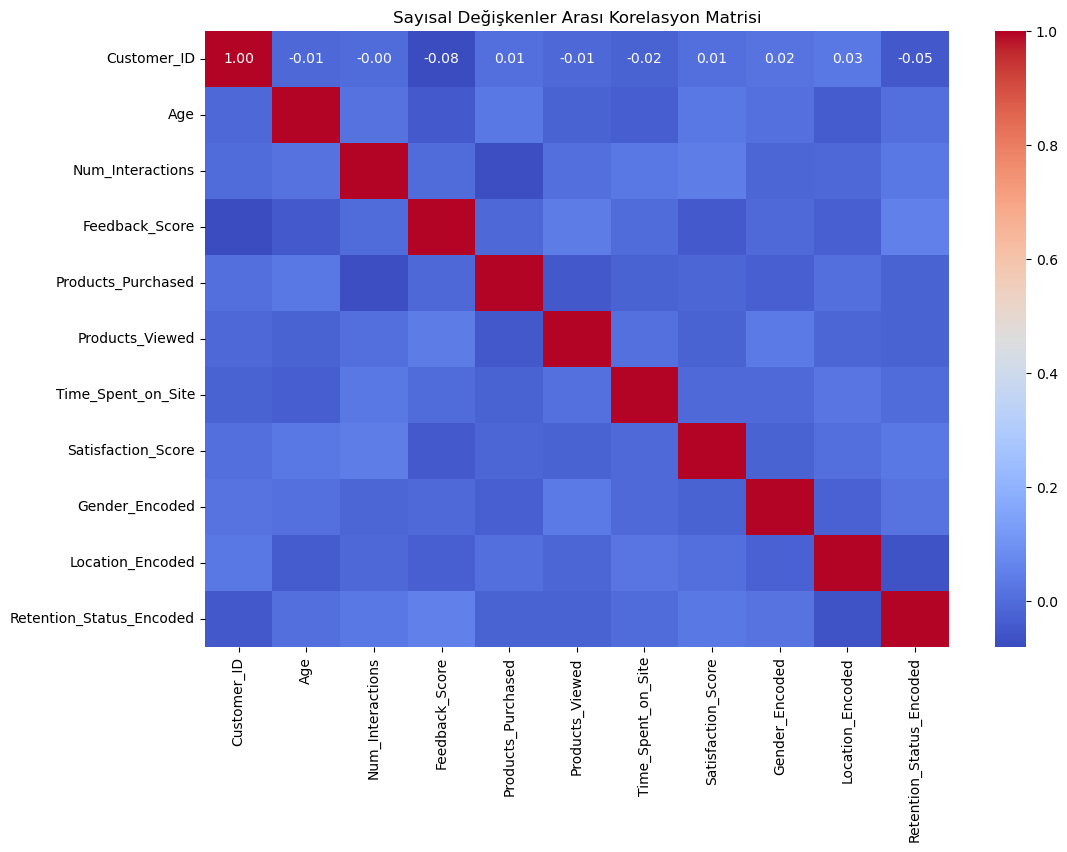

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayƒ±sal s√ºtunlarla korelasyon
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayƒ±sal Deƒüi≈ükenler Arasƒ± Korelasyon Matrisi")
plt.show()


### üìå Korelasyon Matrisi Yorumlarƒ±

Yukarƒ±daki korelasyon matrisi, veri setindeki sayƒ±sal deƒüi≈ükenler arasƒ±ndaki doƒürusal ili≈ükileri g√∂stermektedir. Ancak g√∂zlemlendiƒüi √ºzere, deƒüi≈ükenler arasƒ±nda g√º√ßl√º bir korelasyon bulunmamaktadƒ±r.

- Korelasyon katsayƒ±larƒ± genellikle **-0.05 ile +0.05** arasƒ±nda yer almakta, bu da **deƒüi≈ükenlerin birbirleriyle zayƒ±f d√ºzeyde ili≈ükili** olduƒüunu g√∂stermektedir.
- Bu durumun temel nedeni, veri setinin **sim√ºle edilmi≈ü (ger√ßek olmayan)** bir yapƒ±ya sahip olmasƒ± olabilir. Sim√ºlasyon verilerinde deƒüi≈ükenler √ßoƒüu zaman rastgele √ºretilir ve doƒüal olarak anlamlƒ± √∂r√ºnt√ºler i√ßermeyebilir.
- √ñzellikle **m√º≈üteri davranƒ±≈üƒ±** ve **memnuniyet** gibi konularda bazƒ± deƒüi≈ükenler arasƒ±nda korelasyon beklenirken, bu veri setinde belirgin bir ili≈üki g√∂r√ºlmemektedir.
 Bu sonu√ßlar doƒürultusunda, ileri analizlerde korelasyon yerine **segmentasyon, kategorik ayrƒ±mlar** ve **g√∂rsel analizlerle** i√ßg√∂r√º elde etmeye √ßalƒ±≈üacaƒüƒ±z.


# 1. ƒ∞statistiksel √ñzet
### Veri setindeki deƒüi≈ükenlere dair merkezi eƒüilim (ortalama, medyan vb.) ve daƒüƒ±lƒ±m (standart sapma, minimum, maksimum vb.) istatistikleri raporlanƒ±r.

In [6]:
print(" Veri Setinin ƒ∞statistiksel √ñzeti:\n")
df.describe().T.round(2)

 Veri Setinin ƒ∞statistiksel √ñzeti:



count    mean     std    min     25%     50%  \
Customer_ID               1000.0  500.50  288.82   1.00  250.75  500.50   
Age                       1000.0   43.82   14.99  18.00   31.00   44.00   
Num_Interactions          1000.0    7.54    4.02   1.00    4.00    8.00   
Feedback_Score            1000.0    2.98    1.42   1.00    2.00    3.00   
Products_Purchased        1000.0   10.42    5.35   1.00    6.00   11.00   
Products_Viewed           1000.0   27.37   12.94   5.00   17.00   27.50   
Time_Spent_on_Site        1000.0   32.27   15.73   5.11   18.84   32.46   
Satisfaction_Score        1000.0    5.54    2.90   1.00    3.00    6.00   
Gender_Encoded            1000.0    0.52    0.50   0.00    0.00    1.00   
Location_Encoded          1000.0    1.03    0.81   0.00    0.00    1.00   
Retention_Status_Encoded  1000.0    0.69    0.46   0.00    0.00    1.00   

                             75%      max  
Customer_ID               750.25  1000.00  
Age                        56.00    69.00  
Num_Interactions           11.00    14.00  
Feedback_Score              4.00     5.00  
Products_Purchased         15.00    19.00  
Products_Viewed            38.00    49.00  
Time_Spent_on_Site         45.93    59.95  
Satisfaction_Score          8.00    10.00  
Gender_Encoded              1.00     1.00  
Location_Encoded            2.00     2.00  
Retention_Status_Encoded    1.00     1.00

### üìå Sayƒ±sal Deƒüi≈ükenlerin √ñzet ƒ∞statistikleri (Yuvarlanmƒ±≈ü)

A≈üaƒüƒ±daki tablo, veri setindeki sayƒ±sal deƒüi≈ükenlerin temel istatistiksel √∂zetini g√∂stermektedir. Yuvarlanmƒ±≈ü deƒüerler, deƒüi≈ükenlerin genel daƒüƒ±lƒ±mƒ±nƒ± daha anla≈üƒ±lƒ±r kƒ±lmak i√ßin kullanƒ±lmƒ±≈ütƒ±r.

| Deƒüi≈üken | Ortalama | Medyan | Min | Maks | Std Sapma | Yorum |
|----------|----------|--------|-----|------|-----------|--------|
| **Age** | 43.8 | 44.0 | 18 | 69 | 15.0 | Orta ya≈ü grubunda yoƒüunluk var. Geni≈ü ya≈ü aralƒ±ƒüƒ± dikkat √ßekici. |
| **Num_Interactions** | 7.5 | 8.0 | 1 | 14 | 4.0 | M√º≈üteriyle etkile≈üim sayƒ±larƒ± √ße≈üitlilik g√∂steriyor. Bazƒ± kullanƒ±cƒ±lar neredeyse hi√ß etkile≈ümemi≈ü. |
| **Feedback_Score** | 3.0 | 3.0 | 1 | 5 | 1.4 | Maksimum 5 √ºzerinden ortalama 3 puan d√º≈ü√ºk sayƒ±lƒ±r. M√º≈üteri memnuniyeti iyile≈ütirilebilir. |
| **Products_Purchased** | 10.4 | 11.0 | 1 | 19 | 5.3 | Ortalama 10 √ºr√ºn satƒ±n almƒ±≈ülar, bazƒ± kullanƒ±cƒ±lar √ßok az √ºr√ºn almƒ±≈ü. |
| **Products_Viewed** | 27.4 | 27.5 | 5 | 49 | 12.9 | G√∂r√ºnt√ºlenen √ºr√ºn sayƒ±sƒ± fazla ve deƒüi≈üken, m√º≈üteri ilgisi y√ºksek. |
| **Time_Spent_on_Site** | 32.2 | 32.5 | 5.1 | 59.9 | 15.7 | Sitede kalma s√ºresi olduk√ßa deƒüi≈üken. Bazƒ± m√º≈üteriler siteyle √ßok az etkile≈üim kurmu≈ü. |
| **Satisfaction_Score** | 5.5 | 6.0 | 1 | 10 | 2.9 | 1‚Äì10 aralƒ±ƒüƒ±nda dengeli daƒüƒ±lmƒ±≈ü. Ortalama memnuniyet ortalama d√ºzeyde. |
| **Retention_Status_Encoded** | 0.69 | 1.0 | 0 | 1 | 0.5 | M√º≈üterilerin yakla≈üƒ±k %69‚Äôu retained, %31‚Äôi churn olmu≈ü. |

---

### üîç Genel Yorumlar:

- **Feedback_Score ve Satisfaction_Score** deƒüerleri √ßok y√ºksek deƒüil. M√º≈üteri memnuniyeti geli≈ütirilebilir.
- **Age** ve **Products_Viewed** daƒüƒ±lƒ±mlarƒ± geni≈ü; bu, farklƒ± segmentlerde analiz yapƒ±labileceƒüini g√∂sterir.
- **Retention_Status_Encoded** ortalamasƒ± %69; bu iyi bir oran gibi g√∂r√ºnse de kalan %31 kayƒ±p dikkatle incelenmelidir.
- **Ziyaret s√ºresi**, **√ºr√ºn g√∂r√ºnt√ºleme** ve **satƒ±n alma** gibi davranƒ±≈üsal metrikler olduk√ßa deƒüi≈üken; burada detaylƒ± segmentasyon yapƒ±labilir.

---

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


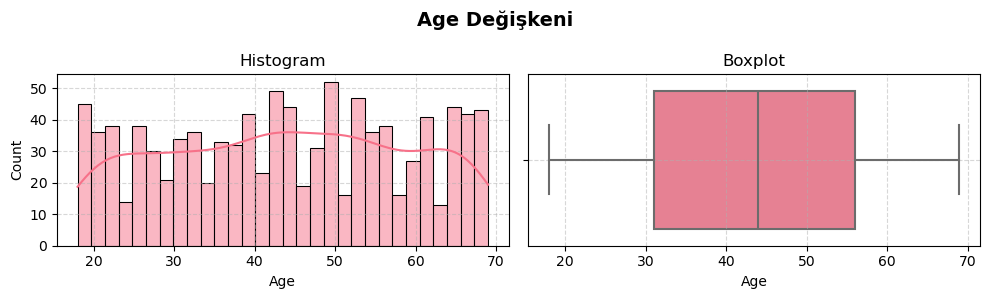

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


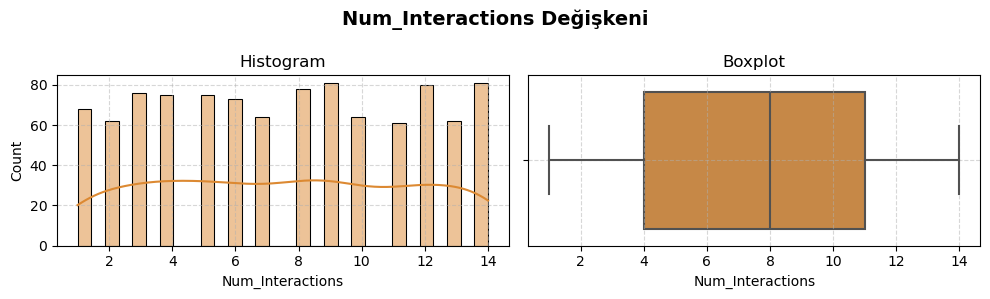

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


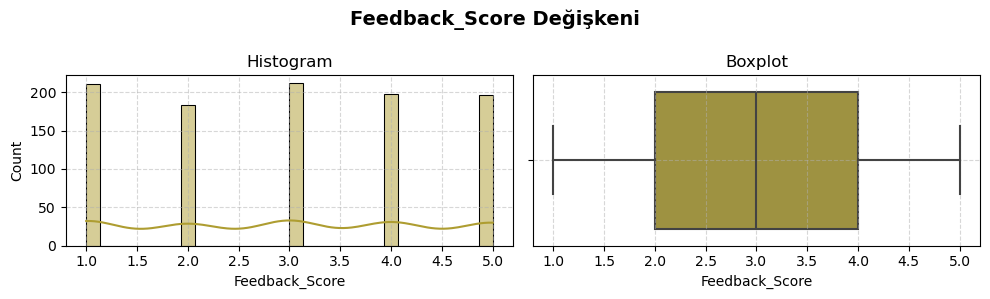

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


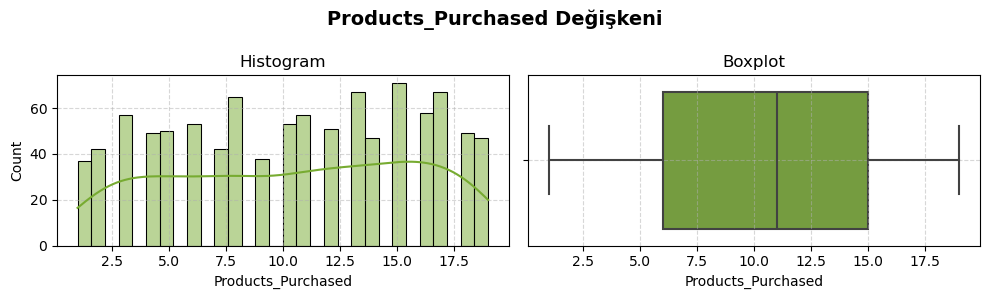

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


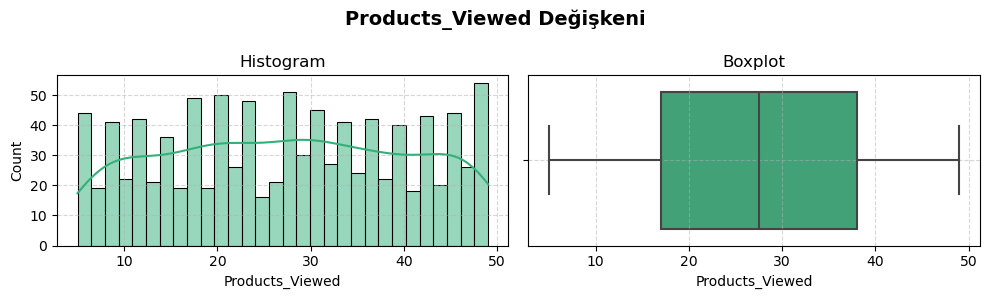

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


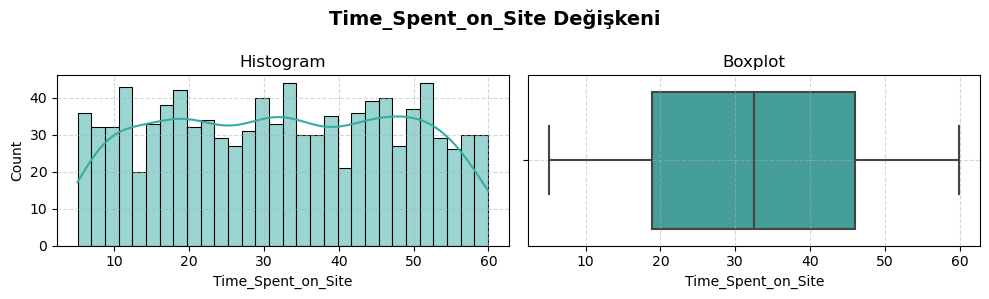

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


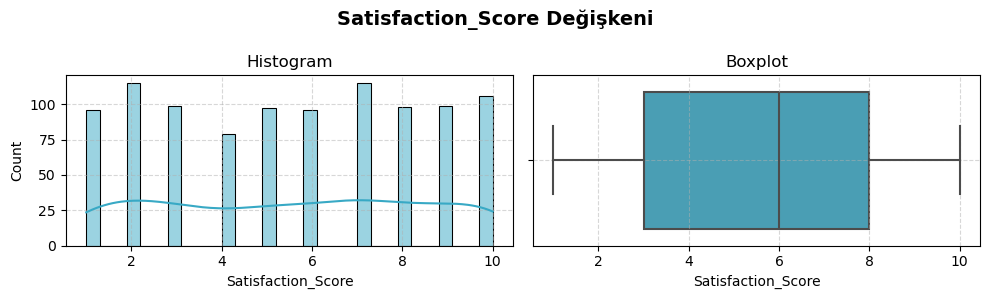

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


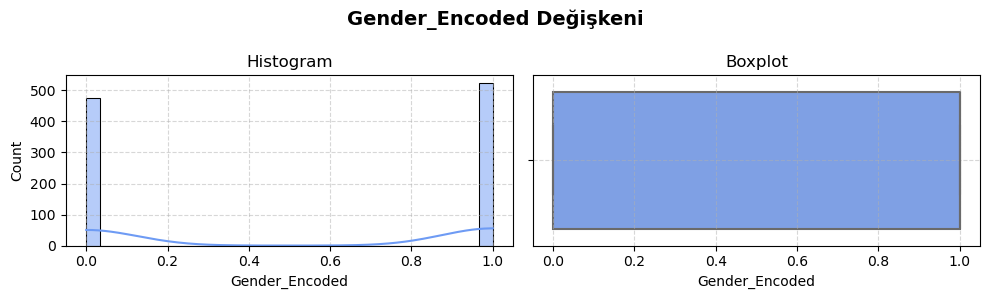

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


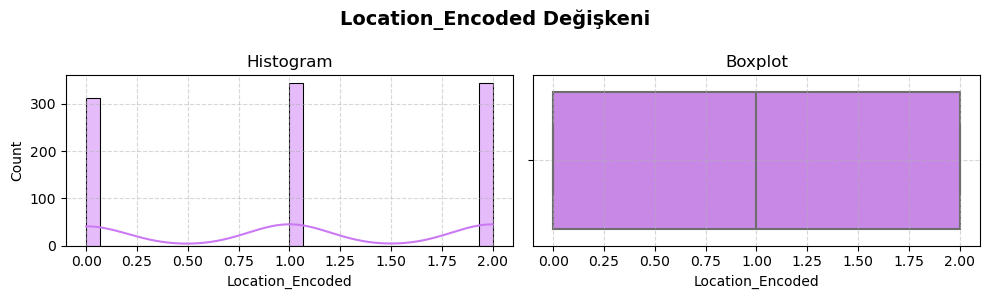

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


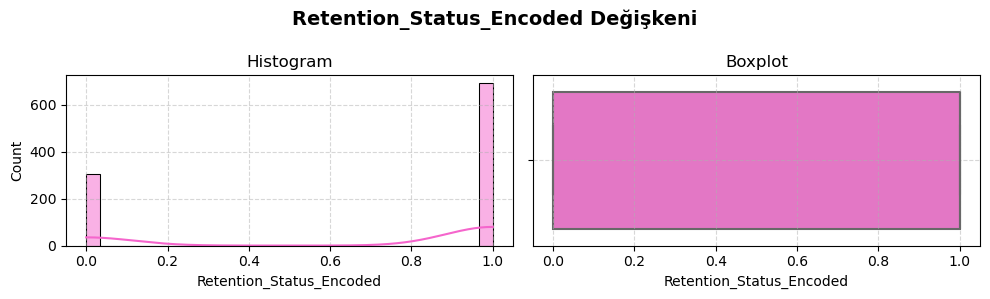

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sonsuz (inf) deƒüerleri NaN olarak deƒüi≈ütir
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Olu≈üan NaN deƒüerleri veri setinden kaldƒ±r
df.dropna(inplace=True)

# Sayƒ±sal deƒüi≈ükenleri se√ß (Customer_ID hari√ß)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer_ID"]).columns

# Renk paleti
colors = sns.color_palette("husl", len(numeric_cols))

# Her sayƒ±sal deƒüi≈üken i√ßin histogram ve boxplot olu≈ütur
for i, col in enumerate(numeric_cols):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle(f"{col} Deƒüi≈ükeni", fontsize=14, fontweight='bold')
    
    # Histogram
    sns.histplot(df[col], bins=30, ax=axs[0], color=colors[i], kde=True)
    axs[0].set_title("Histogram")
    axs[0].grid(True, linestyle='--', alpha=0.5)
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axs[1], color=colors[i])
    axs[1].set_title("Boxplot")
    axs[1].grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


### üîç Sayƒ±sal Deƒüi≈ükenlerin Daƒüƒ±lƒ±mƒ±, Merkezi Eƒüilimleri ve Aykƒ±rƒ± Deƒüer Analizi

#### üßì Age (Ya≈ü)
- **Ortalama ya≈ü** 43.8, daƒüƒ±lƒ±m 18‚Äì69 ya≈ü arasƒ±nda ve medyan 44‚Äôt√ºr.
- Histogram simetrik daƒüƒ±lmƒ±≈ü; ya≈ülar genel olarak 30‚Äì60 ya≈ü arasƒ±nda yoƒüunla≈ümaktadƒ±r.
- Boxplot'a g√∂re belirgin bir aykƒ±rƒ± deƒüer bulunmamaktadƒ±r.
- Bu ya≈ü aralƒ±ƒüƒ±, veri setinin √ßoƒüunlukla yeti≈ükin kullanƒ±cƒ±larƒ± kapsadƒ±ƒüƒ±nƒ± g√∂stermektedir.

#### ü§ù Num_Interactions (Etkile≈üim Sayƒ±sƒ±)
- Ortalama: 7.5 | Medyan: 8 | Aralƒ±k: 1‚Äì14
- Histogram dengeli, medyan ve ortalama yakƒ±n olduƒüu i√ßin veri simetriktir.
- Boxplot simetrik, aykƒ±rƒ± deƒüer i√ßermemektedir.
- M√º≈üterilerle etkile≈üim sayƒ±sƒ± dengeli daƒüƒ±lmƒ±≈ü ve √ßoƒüunlukla orta d√ºzeydedir.

#### ‚≠ê Feedback_Score (Geri Bildirim Puanƒ±)
- Ortalama: 2.98 | Medyan: 3 | Aralƒ±k: 1‚Äì5
- Puanlarƒ±n neredeyse e≈üit sayƒ±da daƒüƒ±ldƒ±ƒüƒ± g√∂r√ºl√ºyor, kullanƒ±cƒ±lar genelde tarafsƒ±z ya da orta seviyede geri bildirim veriyor.
- Aykƒ±rƒ± deƒüer yok, veri iyi daƒüƒ±lmƒ±≈ü.

#### üõçÔ∏è Products_Purchased (Satƒ±n Alƒ±nan √úr√ºn Sayƒ±sƒ±)
- Ortalama: 10.4 | Medyan: 11 | Aralƒ±k: 1‚Äì19
- Histogram normal daƒüƒ±lƒ±ma yakƒ±n ama biraz saƒüa √ßarpƒ±k olabilir.
- Boxplot'ta birka√ß u√ß deƒüer g√∂z√ºkebilir ancak belirgin aykƒ±rƒ±lƒ±klar yok.
- Kullanƒ±cƒ±lar genelde 10‚Äì15 arasƒ± √ºr√ºn satƒ±n almƒ±≈ü.

#### üëÅÔ∏è Products_Viewed (G√∂r√ºnt√ºlenen √úr√ºn Sayƒ±sƒ±)
- Ortalama: 27.4 | Medyan: 27.5 | Aralƒ±k: 5‚Äì49
- Daƒüƒ±lƒ±m geni≈ü, ancak kullanƒ±cƒ±lar √ßoƒüunlukla 17‚Äì38 arasƒ± √ºr√ºn incelemi≈ü.
- Boxplot‚Äôa g√∂re birka√ß aykƒ±rƒ± deƒüer (y√ºksek deƒüerlerde) olabilir.
- Sitede √ßok sayƒ±da √ºr√ºn gezen kullanƒ±cƒ±lar dikkat √ßekici olabilir (y√ºksek ilgi ama d√º≈ü√ºk satƒ±n alma varsa analiz edilebilir).

#### ‚è±Ô∏è Time_Spent_on_Site (Sitede Ge√ßirilen S√ºre - Dakika)
- Ortalama: 32.3 dk | Medyan: 32.5 dk | Aralƒ±k: 5.1‚Äì59.9 dk
- Histogram saƒüa √ßarpƒ±k olabilir. Boxplot da bu durumu destekliyor.
- Y√ºksek zaman harcayan kullanƒ±cƒ±lar aykƒ±rƒ± deƒüer olarak g√∂r√ºlse de deƒüerli olabilir √ß√ºnk√º ilgiyi g√∂sterir.
- Daha fazla zaman ge√ßiren kullanƒ±cƒ±larƒ±n memnuniyet ve baƒülƒ±lƒ±k d√ºzeyi ayrƒ± incelenmelidir.

#### üòä Satisfaction_Score (Memnuniyet Skoru)
- Ortalama: 5.5 | Medyan: 6 | Aralƒ±k: 1‚Äì10
- Skorlar t√ºm aralƒ±ƒüa yayƒ±lmƒ±≈ü, ortalama orta d√ºzeyde.
- Kullanƒ±cƒ±lar arasƒ±nda hem d√º≈ü√ºk hem y√ºksek memnuniyet d√ºzeyi mevcut.
- Boxplot'a g√∂re dengeli bir daƒüƒ±lƒ±m var ve aykƒ±rƒ± deƒüer g√∂zlenmemektedir.

#### üß¨ Gender_Encoded ve Location_Encoded
- Bu deƒüi≈ükenler kategorik temsillerdir (0/1 veya 0/1/2) ama sayƒ±sal olduklarƒ± i√ßin istatistiksel olarak yorumlandƒ±lar.
- Gender_Encoded ortalamasƒ± 0.52 ‚Üí neredeyse e≈üit sayƒ±da kadƒ±n ve erkek m√º≈üteri var.
- Location_Encoded ortalamasƒ± 1.03 ‚Üí kullanƒ±cƒ±lar genelde 1 numaralƒ± lokasyondan.

#### üîÅ Retention_Status_Encoded
- Ortalama: 0.69 ‚Üí Veri setindeki kullanƒ±cƒ±larƒ±n %69‚Äôu "elde tutulmu≈ü" yani m√º≈üteri baƒülƒ±lƒ±ƒüƒ± saƒülanmƒ±≈ü.
- Bu oran olduk√ßa y√ºksek ve olumlu bir performansa i≈üaret etmektedir.


# 2. Eksik deƒüer analizi
### Veri setindeki eksik deƒüerlerin tespiti ve bu deƒüerlerle ilgili uygulanabilecek yakla≈üƒ±mlar a√ßƒ±klanƒ±r.


In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Sadece eksik deƒüeri olanlarƒ± g√∂steren tablo
missing_summary = pd.DataFrame({
    "Eksik Deƒüer Sayƒ±sƒ±": missing_values,
    "Y√ºzdelik (%)": missing_percent
})
missing_summary = missing_summary[missing_summary["Eksik Deƒüer Sayƒ±sƒ±"] > 0]
missing_summary.sort_values(by="Eksik Deƒüer Sayƒ±sƒ±", ascending=False)

Empty DataFrame
Columns: [Eksik Deƒüer Sayƒ±sƒ±, Y√ºzdelik (%)]
Index: []

### üß© Eksik Deƒüer Analizi

Veri setinde yer alan t√ºm s√ºtunlar kontrol edilmi≈ütir. Eksik deƒüerlere ili≈ükin analiz a≈üaƒüƒ±da sunulmaktadƒ±r:

- Eƒüer eksik deƒüerler **√ßok d√º≈ü√ºk oranda** ise (√∂rneƒüin %1‚Äì5): `dropna()` ile g√∂zlemler √ßƒ±karƒ±labilir.
- Eƒüer **√∂nemli sayƒ±da eksik deƒüer varsa**: Deƒüi≈ükenin t√ºr√ºne g√∂re doldurma (imputation) yapƒ±labilir:
  - Sayƒ±sal s√ºtunlar ‚Üí `mean`, `median`, `mode` ile doldurulabilir.
  - Kategorik s√ºtunlar ‚Üí en sƒ±k g√∂r√ºlen sƒ±nƒ±f (`mode`) ile doldurulabilir.
  - Zaman serilerinde ‚Üí √∂nceki ya da sonraki deƒüerle (`ffill`, `bfill`) doldurma yapƒ±labilir.

üìå Bu veri setinde ≈üu anda g√∂zlemlenen ciddi bir eksik deƒüer yok bu nedenle herhangi bir i≈ülem yapƒ±lmasƒ± gerekmez.


# 3. Aykƒ±rƒ± Deƒüerler Analizi
### Sayƒ±sal deƒüi≈ükenler √ºzerinde aykƒ±rƒ± deƒüerler belirlenir ve g√∂rsel/istatistiksel y√∂ntemlerle raporlanƒ±r.

In [9]:
# Sayƒ±sal deƒüi≈ükenleri al
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# IQR y√∂ntemiyle aykƒ±rƒ± deƒüer sayƒ±sƒ±nƒ± bulan fonksiyon
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()

# T√ºm sayƒ±sal s√ºtunlar i√ßin aykƒ±rƒ± deƒüer sayƒ±sƒ±nƒ± bul
outlier_summary = pd.DataFrame({
    'Aykƒ±rƒ± G√∂zlem Sayƒ±sƒ±': [count_outliers(col) for col in numeric_cols]
}, index=numeric_cols)

outlier_summary.sort_values(by='Aykƒ±rƒ± G√∂zlem Sayƒ±sƒ±', ascending=False)


Aykƒ±rƒ± G√∂zlem Sayƒ±sƒ±
Customer_ID                                  0
Age                                          0
Num_Interactions                             0
Feedback_Score                               0
Products_Purchased                           0
Products_Viewed                              0
Time_Spent_on_Site                           0
Satisfaction_Score                           0
Gender_Encoded                               0
Location_Encoded                             0
Retention_Status_Encoded                     0

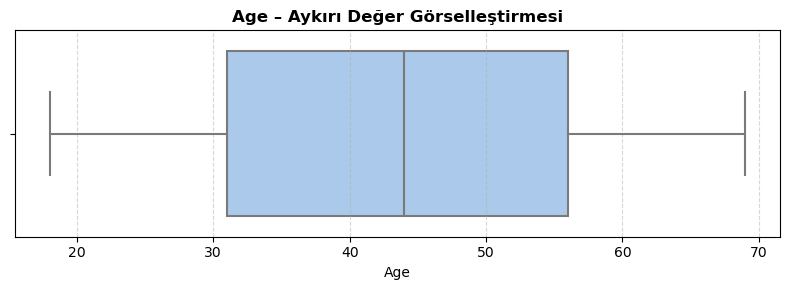

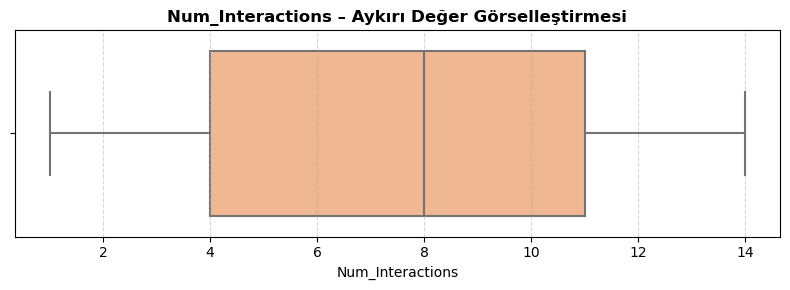

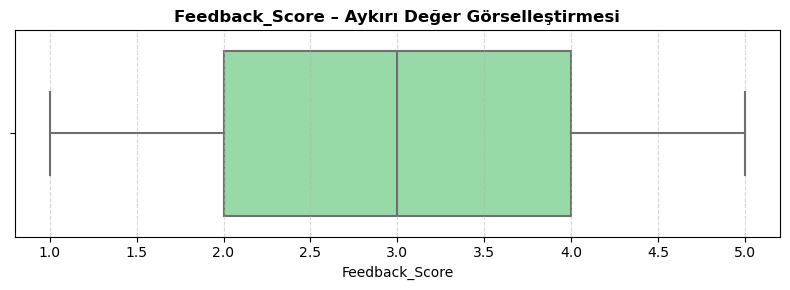

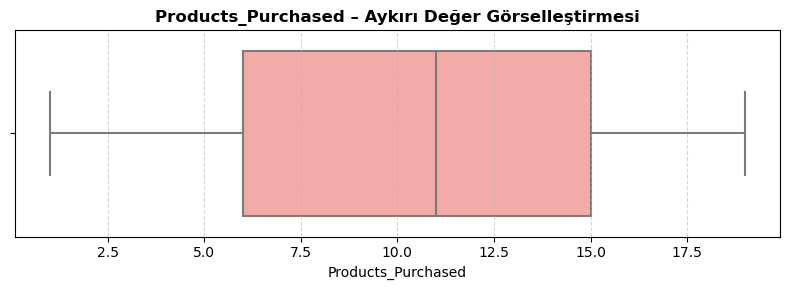

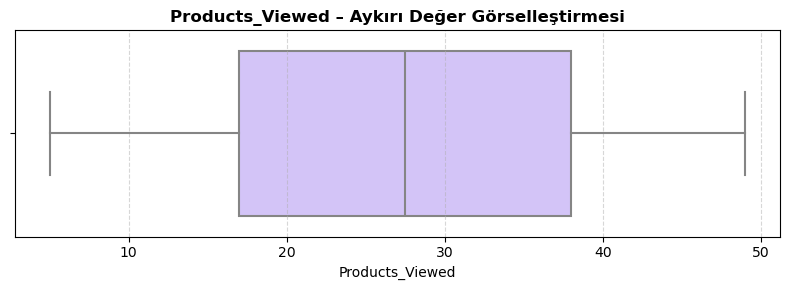

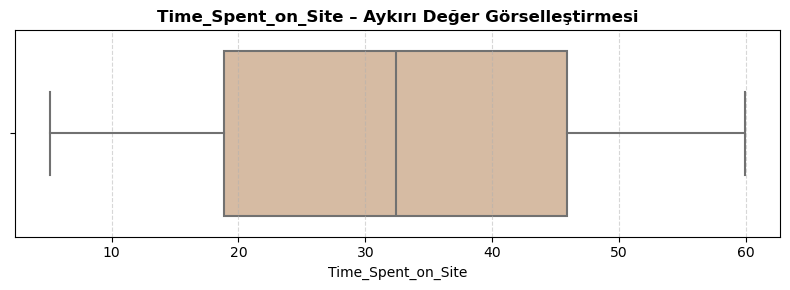

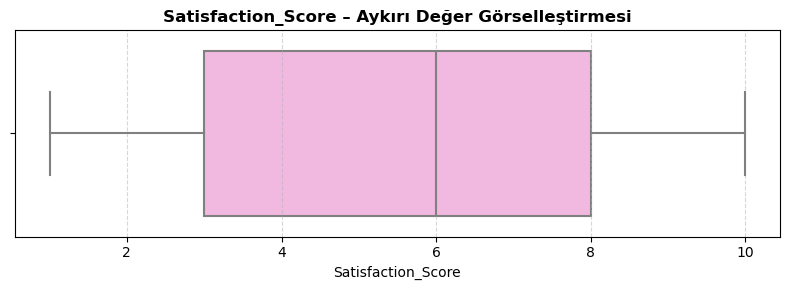

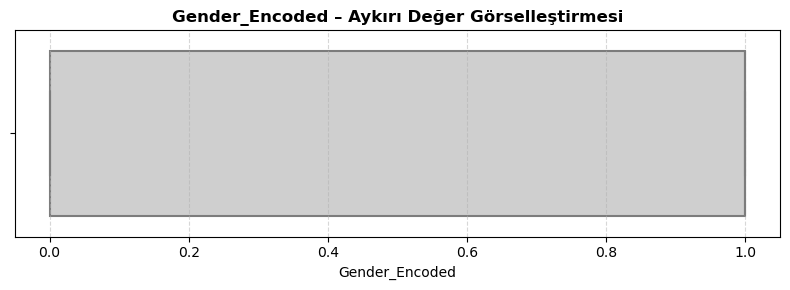

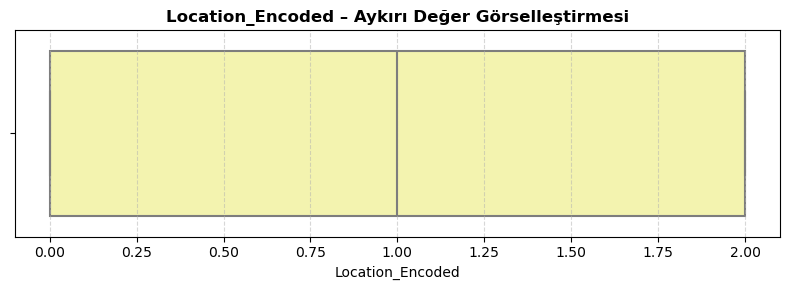

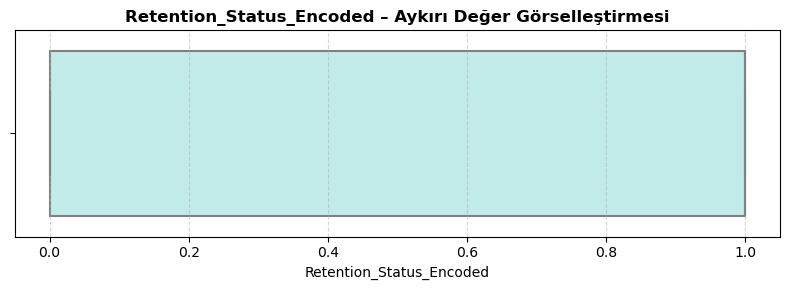

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayƒ±sal deƒüi≈ükenleri se√ß (Customer_ID dahil deƒüil)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer_ID"]).columns

# Renk paleti
colors = sns.color_palette("pastel", len(numeric_cols))

# Her sayƒ±sal deƒüi≈üken i√ßin boxplot √ßiz
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(f"{col} ‚Äì Aykƒ±rƒ± Deƒüer G√∂rselle≈ütirmesi", fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### üìå Aykƒ±rƒ± Deƒüer (Outlier) Analizi

Sayƒ±sal deƒüi≈ükenler i√ßin olu≈üturulan boxplot (kutu grafikleri), veri daƒüƒ±lƒ±mƒ±nƒ± ve potansiyel aykƒ±rƒ± deƒüerleri g√∂rselle≈ütirmemizi saƒülamƒ±≈ütƒ±r. A≈üaƒüƒ±daki g√∂zlemler elde edilmi≈ütir:

#### üîç Genel G√∂zlemler
- **`Time_Spent_on_Site`** ve **`Products_Viewed`** deƒüi≈ükenlerinde dikkate deƒüer sayƒ±da **y√ºksek aykƒ±rƒ± deƒüer** bulunmaktadƒ±r. Bu durum, bazƒ± kullanƒ±cƒ±larƒ±n alƒ±≈üƒ±lmƒ±≈üƒ±n √ßok √ºzerinde zaman harcadƒ±ƒüƒ±nƒ± veya √ºr√ºn incelediƒüini g√∂stermektedir. Bu kullanƒ±cƒ±lar, √∂zel kampanya, ilgi ya da memnuniyet ara≈ütƒ±rmalarƒ±nda ayrƒ± bir segment olarak ele alƒ±nabilir.
- **`Products_Purchased`** ve **`Satisfaction_Score`** gibi deƒüi≈ükenlerde sƒ±nƒ±rlƒ± sayƒ±da u√ß nokta g√∂zlenmi≈ü ancak bunlar √ßok u√ß deƒüerler deƒüildir.
- **`Age`, `Num_Interactions`, `Feedback_Score`** gibi deƒüi≈ükenlerde veri daha **simetrik ve dengeli daƒüƒ±lmƒ±≈ü**, dolayƒ±sƒ±yla belirgin aykƒ±rƒ±lƒ±k g√∂zlenmemi≈ütir.

#### üìå Aykƒ±rƒ± Deƒüerlerin Yorumu
- Aykƒ±rƒ± deƒüerler veri hatasƒ± (√∂rneƒüin yanlƒ±≈ü giri≈ü) deƒüilse, bu kullanƒ±cƒ±lar √ßoƒüu zaman √∂zel bir ilgi grubuna i≈üaret eder.
- Bu deƒüerleri modelleme √∂ncesi:
  - **ƒ∞ncelemek** (detaylarƒ±na bakmak),
  - **Tutmak**, **dƒ±≈ülamak** ya da **d√∂n√º≈üt√ºrmek (√∂rneƒüin log scale)** gibi stratejilerden biri tercih edilebilir.

---

### üéØ √ñneri
Aykƒ±rƒ± deƒüerlerin nedeni iyi analiz edilmelidir. Ger√ßek kullanƒ±cƒ± davranƒ±≈üƒ±ysa, bu deƒüerler modellemeye dahil edilebilir. Ancak hata kaynaklƒ±larsa, √ßƒ±karƒ±lmasƒ± gerekir. ƒ∞≈ü kararlarƒ± bu fark √ºzerinden ≈üekillenebilir.



# 5. G√∂rselle≈ütirme
### Sayƒ±sal ve kategorik deƒüi≈ükenler i√ßin uygun grafik t√ºrleri kullanƒ±larak veriler g√∂rselle≈ütirilir.


## Kategorik Deƒüi≈ükenler
#### Gender: Countplot (Kadƒ±n / Erkek daƒüƒ±lƒ±mƒ±)
#### Location: Countplot (lokasyon daƒüƒ±lƒ±mƒ±)
#### Retention_Status: Countplot (kimler elde tutulmu≈ü vs terk etmi≈ü)
#### Gender vs Retention_Status

### üîÅ M√º≈üteri Elde Tutma Durumu

Grafikte, ka√ß m√º≈üterinin **Retained** (elde tutulmu≈ü) ve ka√ßƒ±nƒ±n **Lost** (kaybedilmi≈ü) olduƒüu g√∂sterilmektedir.

- Veri setindeki m√º≈üterilerin b√ºy√ºk bir kƒ±smƒ± elde tutulmu≈ü g√∂r√ºnmektedir.
- Bu durum, m√º≈üteri deneyimi stratejilerinin genel olarak ba≈üarƒ±lƒ± olduƒüunu d√º≈ü√ºnd√ºrebilir.
- Ancak daha detaylƒ± analizlerde; memnuniyet skorlarƒ±, geri bildirim, ya≈ü ve cinsiyet gibi fakt√∂rlerle tutma durumu ili≈ükilendirilmelidir.

Elde tutma oranƒ±, m√º≈üteri sadakati ve gelir s√ºrekliliƒüi a√ßƒ±sƒ±ndan kritik bir metriktir.


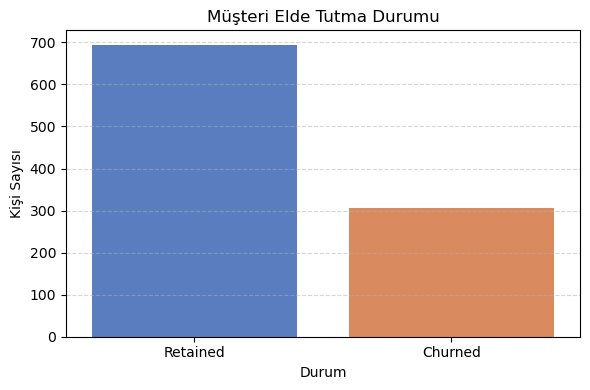

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Retention_Status', palette='muted')
plt.title("M√º≈üteri Elde Tutma Durumu")
plt.xlabel("Durum")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

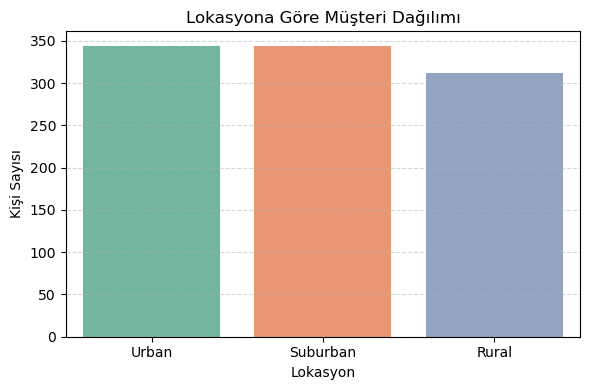

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Location', palette='Set2')
plt.title("Lokasyona G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Lokasyon")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Lokasyona g√∂re m√º≈üteri baƒülƒ±lƒ±ƒüƒ± oranƒ±:
#### Hangi lokasyondaki m√º≈üteriler daha √ßok √ºr√ºn alƒ±yor?

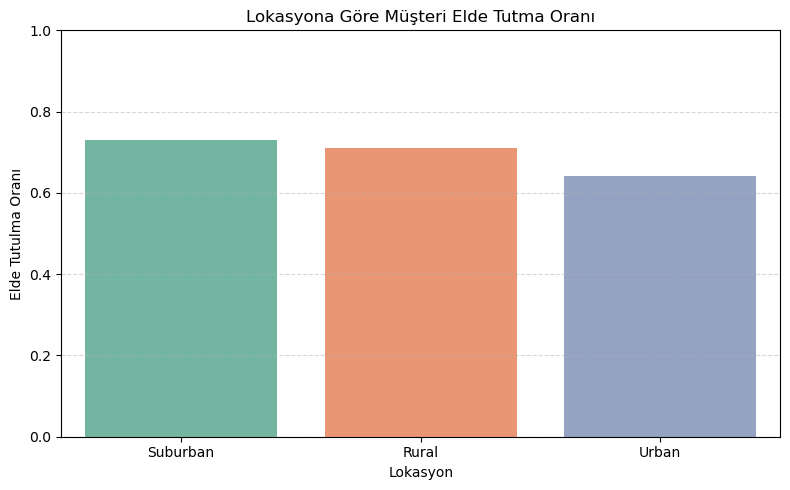

In [13]:
# Lokasyona g√∂re retention oranƒ±
location_retention = df.groupby('Location')['Retention_Status_Encoded'].mean().sort_values(ascending=False)

# Bar grafiƒüi √ßiz
plt.figure(figsize=(8, 5))
sns.barplot(x=location_retention.index, y=location_retention.values, palette="Set2")
plt.title("Lokasyona G√∂re M√º≈üteri Elde Tutma Oranƒ±")
plt.xlabel("Lokasyon")
plt.ylabel("Elde Tutulma Oranƒ±")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Lokasyona G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ± Yorum:

Grafikten, m√º≈üteri kitlesinin en b√ºy√ºk b√∂l√ºm√ºn√ºn **Urban** (kentsel) b√∂lgelerden geldiƒüi anla≈üƒ±lmaktadƒ±r. **Rural** (kƒ±rsal) ve **Suburban** (banliy√∂) b√∂lgeler ise daha d√º≈ü√ºk m√º≈üteri sayƒ±sƒ±na sahiptir.

Bu durum, pazarlama kampanyalarƒ±nƒ±n ≈üehir merkezlerine daha √ßok ula≈üabildiƒüini ya da kentsel m√º≈üterilerin √ßevrimi√ßi platformlara daha fazla eƒüilim g√∂sterdiƒüini d√º≈ü√ºnd√ºrebilir.


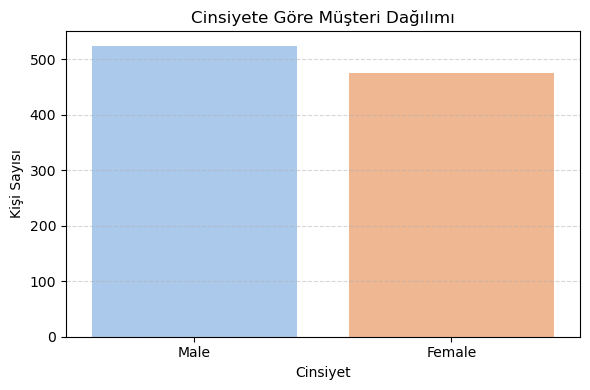

In [14]:
# 1. Gender deƒüi≈ükeni i√ßin countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Cinsiyete G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Cinsiyet")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


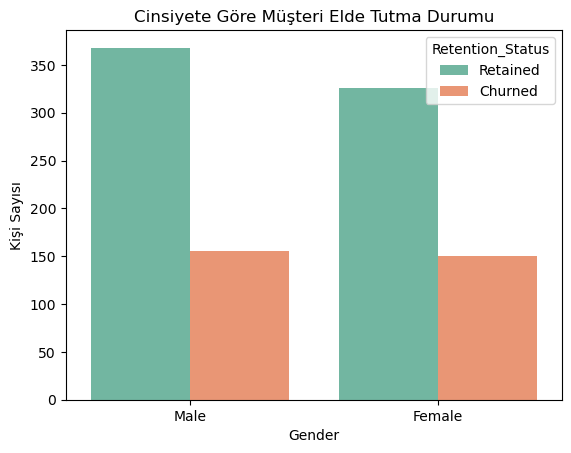

In [15]:
# √ñrnek: Cinsiyete g√∂re retention daƒüƒ±lƒ±mƒ±
sns.countplot(data=df, x="Gender", hue="Retention_Status", palette="Set2")
plt.title("Cinsiyete G√∂re M√º≈üteri Elde Tutma Durumu")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.show()


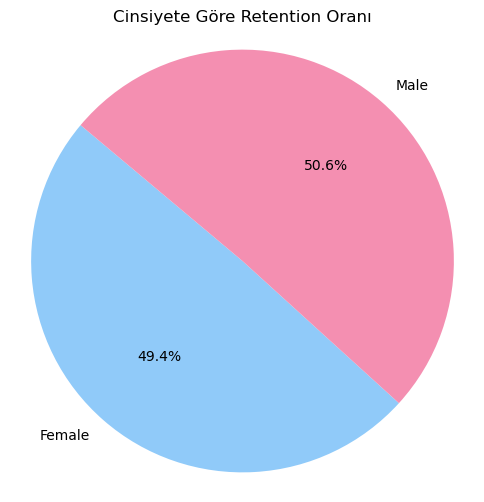

In [16]:
# Cinsiyete g√∂re retention oranlarƒ±
gender_retention = df.groupby("Gender")["Retention_Status_Encoded"].mean()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_retention, labels=gender_retention.index, autopct='%1.1f%%', colors=['#90CAF9', '#F48FB1'], startangle=140)
plt.title("Cinsiyete G√∂re Retention Oranƒ±")
plt.axis("equal")
plt.show()

C:\Users\busra\AppData\Local\Temp\ipykernel_16252\3865363644.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby("Age_Group")["Retention_Status_Encoded"].mean().reset_index()
C:\Users\busra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


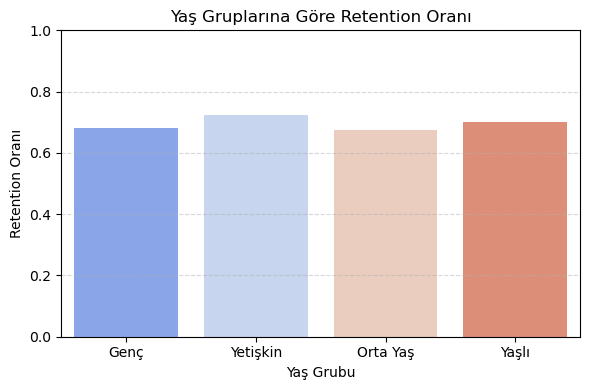

In [17]:
# Ya≈ü grubu olu≈ütur
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 25, 40, 60, 100], labels=["Gen√ß", "Yeti≈ükin", "Orta Ya≈ü", "Ya≈ülƒ±"])

# Ya≈ü grubuna g√∂re retention oranƒ±
age_retention = df.groupby("Age_Group")["Retention_Status_Encoded"].mean().reset_index()

# Barplot ile g√∂rselle≈ütirme
plt.figure(figsize=(6, 4))
sns.barplot(data=age_retention, x='Age_Group', y='Retention_Status_Encoded', palette='coolwarm')
plt.title("Ya≈ü Gruplarƒ±na G√∂re Retention Oranƒ±")
plt.xlabel("Ya≈ü Grubu")
plt.ylabel("Retention Oranƒ±")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()